In [61]:
import numpy as np 
from numpy import log,dot,exp,shape
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  

1.Implement sigmoid function


In [62]:
def sigmoid(x,w):
  return 1/(1+np.exp(-1*np.dot(x,w)))
  

2.Implement Logistic Regression


In [63]:
class LogisticRegression():
  def _init_(self):
    pass
  def _initialize(self,X):
    pass
  def fit(self,X,y,lr,N):
    w=np.random.randn(X.shape[1],1)
    cnt=0
    ones=np.ones((X.shape[0],1))
    while cnt <N:
      w=w-lr*np.dot(X.T,sigmoid(X,w)-y.reshape(-1,1))
      cnt+=1
      if -1*(np.dot(y.reshape(1,-1),np.log(sigmoid(X,w)))+np.dot((ones.T-y.reshape(1,-1)),np.log(ones-sigmoid(X,w)))) <= 1e-4 :
        break
    return w  
  def loss_his(self,X):
    pass
  def predict(self,X,w):
      pred=np.random.randn(X.shape[0],)
      pred[np.where(sigmoid(X,w).reshape(1,-1)[0]>0.5)]=1
      pred[np.where(sigmoid(X,w).reshape(1,-1)[0]<0.5)]=0
      return pred

3a.Tạo và visualize dữ liệu


[0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1
 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0
 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0]


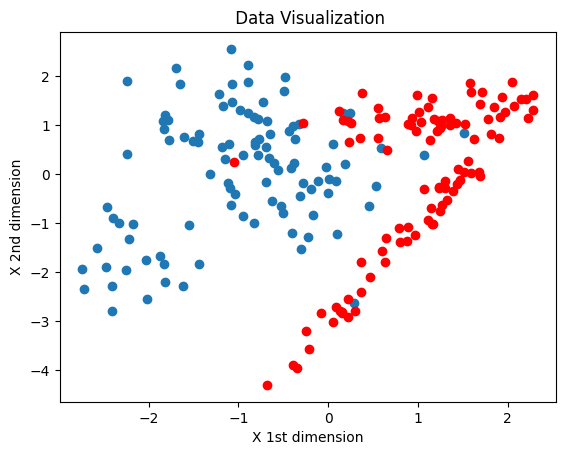

In [64]:
X,y=make_classification(n_samples=200, n_features=2,n_classes=2,n_informative=2,n_redundant=0,n_repeated=0)
print(y)
plt.scatter(X[np.where(y==0)[0],0],X[np.where(y==0)[0],1])
plt.scatter(X[np.where(y==1)[0],0],X[np.where(y==1)[0],1],c='r')
plt.xlabel("X 1st dimension")
plt.ylabel("X 2nd dimension")
plt.title(" Data Visualization")
plt.show()

3.b:Chia dữ liệu: 8 train 2 test

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)


4.fit dữ liệu


In [66]:
model=LogisticRegression()
w=model.fit(X_train,y_train,0.1,1000)
y_test_pred=model.predict(X_test,w)
y_train_pred=model.predict(X_train,w)
def f1_score(y_pred,y_true):
  m=np.where(y_pred==1)[0]
  n=np.where(y_true==1)[0]
  pre=len([i for i in m if i in n])/len(np.where(y_pred==1)[0])
  rec=len([i for i in m if i in n])/len(np.where(y_true==1)[0])
  return 2*pre*rec/(pre+rec)
print("f1 score train:",f1_score(y_train_pred,y_train))
print("f1 score test:",f1_score(y_test_pred,y_test))  



f1 score train: 0.8658536585365854
f1 score test: 0.8947368421052632
